In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import warnings
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
warnings.filterwarnings('ignore')

In [2]:
link = 'https://drive.google.com/file/d/1_H1j57EahEEXpZtQ413BpF2JiAAr1Anv/view?usp=share_link'
id = "1_H1j57EahEEXpZtQ413BpF2JiAAr1Anv"
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('flights.csv')  

1_H1j57EahEEXpZtQ413BpF2JiAAr1Anv


## Import Dataset

In [3]:
import  pandas as pd
import  numpy as np

flights = pd.read_csv("flights.csv")

## Display Dataset

In [4]:
print("Flights Data")
display(flights)

Flights Data


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing

In [5]:
#The purpose is to predict the delay, so Dataset "airlines" and "airports" will be process later as labels.

#Clean up the main dataset "flights"
columns = flights.columns
print("Features of current dataset",columns)

#Clean up the non-related data
#Drop the reason of delaying / Cancellation_reasons / cancelled / diverted etc.
#Reason of dropping, please see README
flights=flights.drop(['WEATHER_DELAY','LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','SECURITY_DELAY','AIR_SYSTEM_DELAY','CANCELLATION_REASON',
 "CANCELLED", "DIVERTED","TAXI_IN", "TAXI_OUT"],axis=1)

columns = flights.columns
print("Features after cleaning unrelated dataset",columns)

Features of current dataset Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')
Features after cleaning unrelated dataset Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],
     

In [6]:
#Clean up the overlap numbers, reasons please see the README
flights=flights.drop(['SCHEDULED_ARRIVAL','ARRIVAL_TIME','DEPARTURE_TIME','SCHEDULED_DEPARTURE','TAIL_NUMBER','FLIGHT_NUMBER', 'WHEELS_OFF', 'WHEELS_ON', "SCHEDULED_TIME", "ELAPSED_TIME"],axis=1)

# Since all data is collected from 2015, year is meaningless to help prediction
print(flights["YEAR"].unique())
flights=flights.drop(['YEAR'],axis=1)

[2015]


In [7]:
columns = flights.columns
print("Features after cleaning unrelated dataset",columns)
flights.shape

Features after cleaning unrelated dataset Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'AIR_TIME', 'DISTANCE',
       'ARRIVAL_DELAY'],
      dtype='object')


(5819079, 10)

In [8]:
print(flights.dtypes)
flights

MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
DEPARTURE_DELAY        float64
AIR_TIME               float64
DISTANCE                 int64
ARRIVAL_DELAY          float64
dtype: object


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,AIR_TIME,DISTANCE,ARRIVAL_DELAY
0,1,1,4,AS,ANC,SEA,-11.0,169.0,1448,-22.0
1,1,1,4,AA,LAX,PBI,-8.0,263.0,2330,-9.0
2,1,1,4,US,SFO,CLT,-2.0,266.0,2296,5.0
3,1,1,4,AA,LAX,MIA,-5.0,258.0,2342,-9.0
4,1,1,4,AS,SEA,ANC,-1.0,199.0,1448,-21.0
...,...,...,...,...,...,...,...,...,...,...
5819074,12,31,4,B6,LAX,BOS,-4.0,272.0,2611,-26.0
5819075,12,31,4,B6,JFK,PSE,-4.0,195.0,1617,-16.0
5819076,12,31,4,B6,JFK,SJU,-9.0,197.0,1598,-8.0
5819077,12,31,4,B6,MCO,SJU,-6.0,144.0,1189,-10.0


In [9]:
object_features = flights.iloc[:, 3:6]
display(object_features.dtypes)
object_features=object_features.astype("str")

AIRLINE                object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
dtype: object

In [10]:
#Encode the object type features ("AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT")
from sklearn import preprocessing
encoder = preprocessing.OrdinalEncoder()
encoder.fit(object_features)
object_features_encoded = encoder.transform(object_features)
print(object_features_encoded, object_features_encoded.shape)

#Since there are over 900 airports and 14 airlines 
#One hod encoding for "AIRLINE","DAY_OF_WEEK", "MONTH"
#Ordinal encoding for "ORIGIN_AIRPORT", "DESTINATION_AIRPORT", "DAY"

print(len(pd.unique(flights['ORIGIN_AIRPORT'])))
print(len(pd.unique(flights['DESTINATION_AIRPORT'])))
print(len(pd.unique(flights['AIRLINE'])))
display(flights)

[[  1. 323. 584.]
 [  0. 482. 542.]
 [ 11. 584. 373.]
 ...
 [  2. 472. 592.]
 [  2. 499. 592.]
 [  2. 472. 349.]] (5819079, 3)
930
930
14


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,AIR_TIME,DISTANCE,ARRIVAL_DELAY
0,1,1,4,AS,ANC,SEA,-11.0,169.0,1448,-22.0
1,1,1,4,AA,LAX,PBI,-8.0,263.0,2330,-9.0
2,1,1,4,US,SFO,CLT,-2.0,266.0,2296,5.0
3,1,1,4,AA,LAX,MIA,-5.0,258.0,2342,-9.0
4,1,1,4,AS,SEA,ANC,-1.0,199.0,1448,-21.0
...,...,...,...,...,...,...,...,...,...,...
5819074,12,31,4,B6,LAX,BOS,-4.0,272.0,2611,-26.0
5819075,12,31,4,B6,JFK,PSE,-4.0,195.0,1617,-16.0
5819076,12,31,4,B6,JFK,SJU,-9.0,197.0,1598,-8.0
5819077,12,31,4,B6,MCO,SJU,-6.0,144.0,1189,-10.0


In [11]:
num_flights = flights.loc[:,['DEPARTURE_DELAY',"AIR_TIME","DISTANCE"]]
one_hot_original = flights.loc[:,['AIRLINE',"DAY_OF_WEEK","MONTH"]]
ordinal_orginal = flights.loc[:,['DAY',"ORIGIN_AIRPORT","DESTINATION_AIRPORT"]]

display(one_hot_original)
encoder = preprocessing.OneHotEncoder()
encoder.fit(one_hot_original)
one_hot = encoder.transform(one_hot_original)
print(one_hot.shape)


display(one_hot_original)
one_hot_encode=one_hot_original.astype("str")
encoder = preprocessing.OrdinalEncoder()
encoder.fit(one_hot_encode)
ordinal_cat = encoder.transform(one_hot_encode)
print(ordinal_cat, ordinal_cat.shape)

display(ordinal_orginal)
ordinal_orginal["DAY"] = ordinal_orginal["DAY"].astype("str")
ordinal_orginal.dtypes
ordinal_orginal=ordinal_orginal.astype("str")
#ordinal_orginal.dtypes
encoder = preprocessing.OrdinalEncoder()
encoder.fit(ordinal_orginal)
ordinal = encoder.transform(ordinal_orginal)
print(ordinal, ordinal.shape)

df_ordinal = pd.DataFrame(ordinal, columns = ['DAY','ORIGIN_AIRPORT','DESTINATION_AIRPORT'])
df_cat = pd.DataFrame(ordinal_cat, columns = ['AIRLINE','DAY_OF_WEEK','MONTH'])

df_flights = num_flights.join(df_ordinal)
df_flights = df_flights.join(df_cat)
df_flights

,AIRLINE,DAY_OF_WEEK,MONTH
0,AS,4,1
1,AA,4,1
2,US,4,1
3,AA,4,1
4,AS,4,1
...,...,...,...
5819074,B6,4,12
5819075,B6,4,12
5819076,B6,4,12
5819077,B6,4,12


(5819079, 33)


,AIRLINE,DAY_OF_WEEK,MONTH
0,AS,4,1
1,AA,4,1
2,US,4,1
3,AA,4,1
4,AS,4,1
...,...,...,...
5819074,B6,4,12
5819075,B6,4,12
5819076,B6,4,12
5819077,B6,4,12


[[ 1.  3.  0.]
 [ 0.  3.  0.]
 [11.  3.  0.]
 ...
 [ 2.  3.  3.]
 [ 2.  3.  3.]
 [ 2.  3.  3.]] (5819079, 3)


,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,1,ANC,SEA
1,1,LAX,PBI
2,1,SFO,CLT
3,1,LAX,MIA
4,1,SEA,ANC
...,...,...,...
5819074,31,LAX,BOS
5819075,31,JFK,PSE
5819076,31,JFK,SJU
5819077,31,MCO,SJU


[[  0. 323. 584.]
 [  0. 482. 542.]
 [  0. 584. 373.]
 ...
 [ 24. 472. 592.]
 [ 24. 499. 592.]
 [ 24. 472. 349.]] (5819079, 3)


,DEPARTURE_DELAY,AIR_TIME,DISTANCE,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIRLINE,DAY_OF_WEEK,MONTH
0,-11.0,169.0,1448,0.0,323.0,584.0,1.0,3.0,0.0
1,-8.0,263.0,2330,0.0,482.0,542.0,0.0,3.0,0.0
2,-2.0,266.0,2296,0.0,584.0,373.0,11.0,3.0,0.0
3,-5.0,258.0,2342,0.0,482.0,510.0,0.0,3.0,0.0
4,-1.0,199.0,1448,0.0,583.0,324.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...
5819074,-4.0,272.0,2611,24.0,482.0,346.0,2.0,3.0,3.0
5819075,-4.0,195.0,1617,24.0,472.0,555.0,2.0,3.0,3.0
5819076,-9.0,197.0,1598,24.0,472.0,592.0,2.0,3.0,3.0
5819077,-6.0,144.0,1189,24.0,499.0,592.0,2.0,3.0,3.0


### Figure Display after Encoding

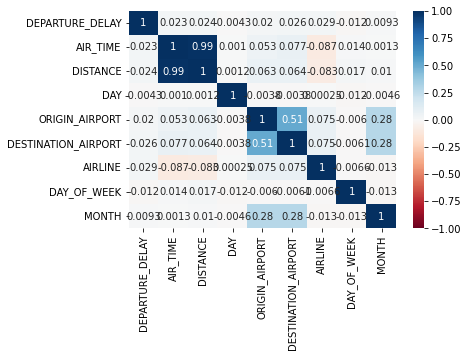

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df_flights.corr()
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0,cmap= 'RdBu')

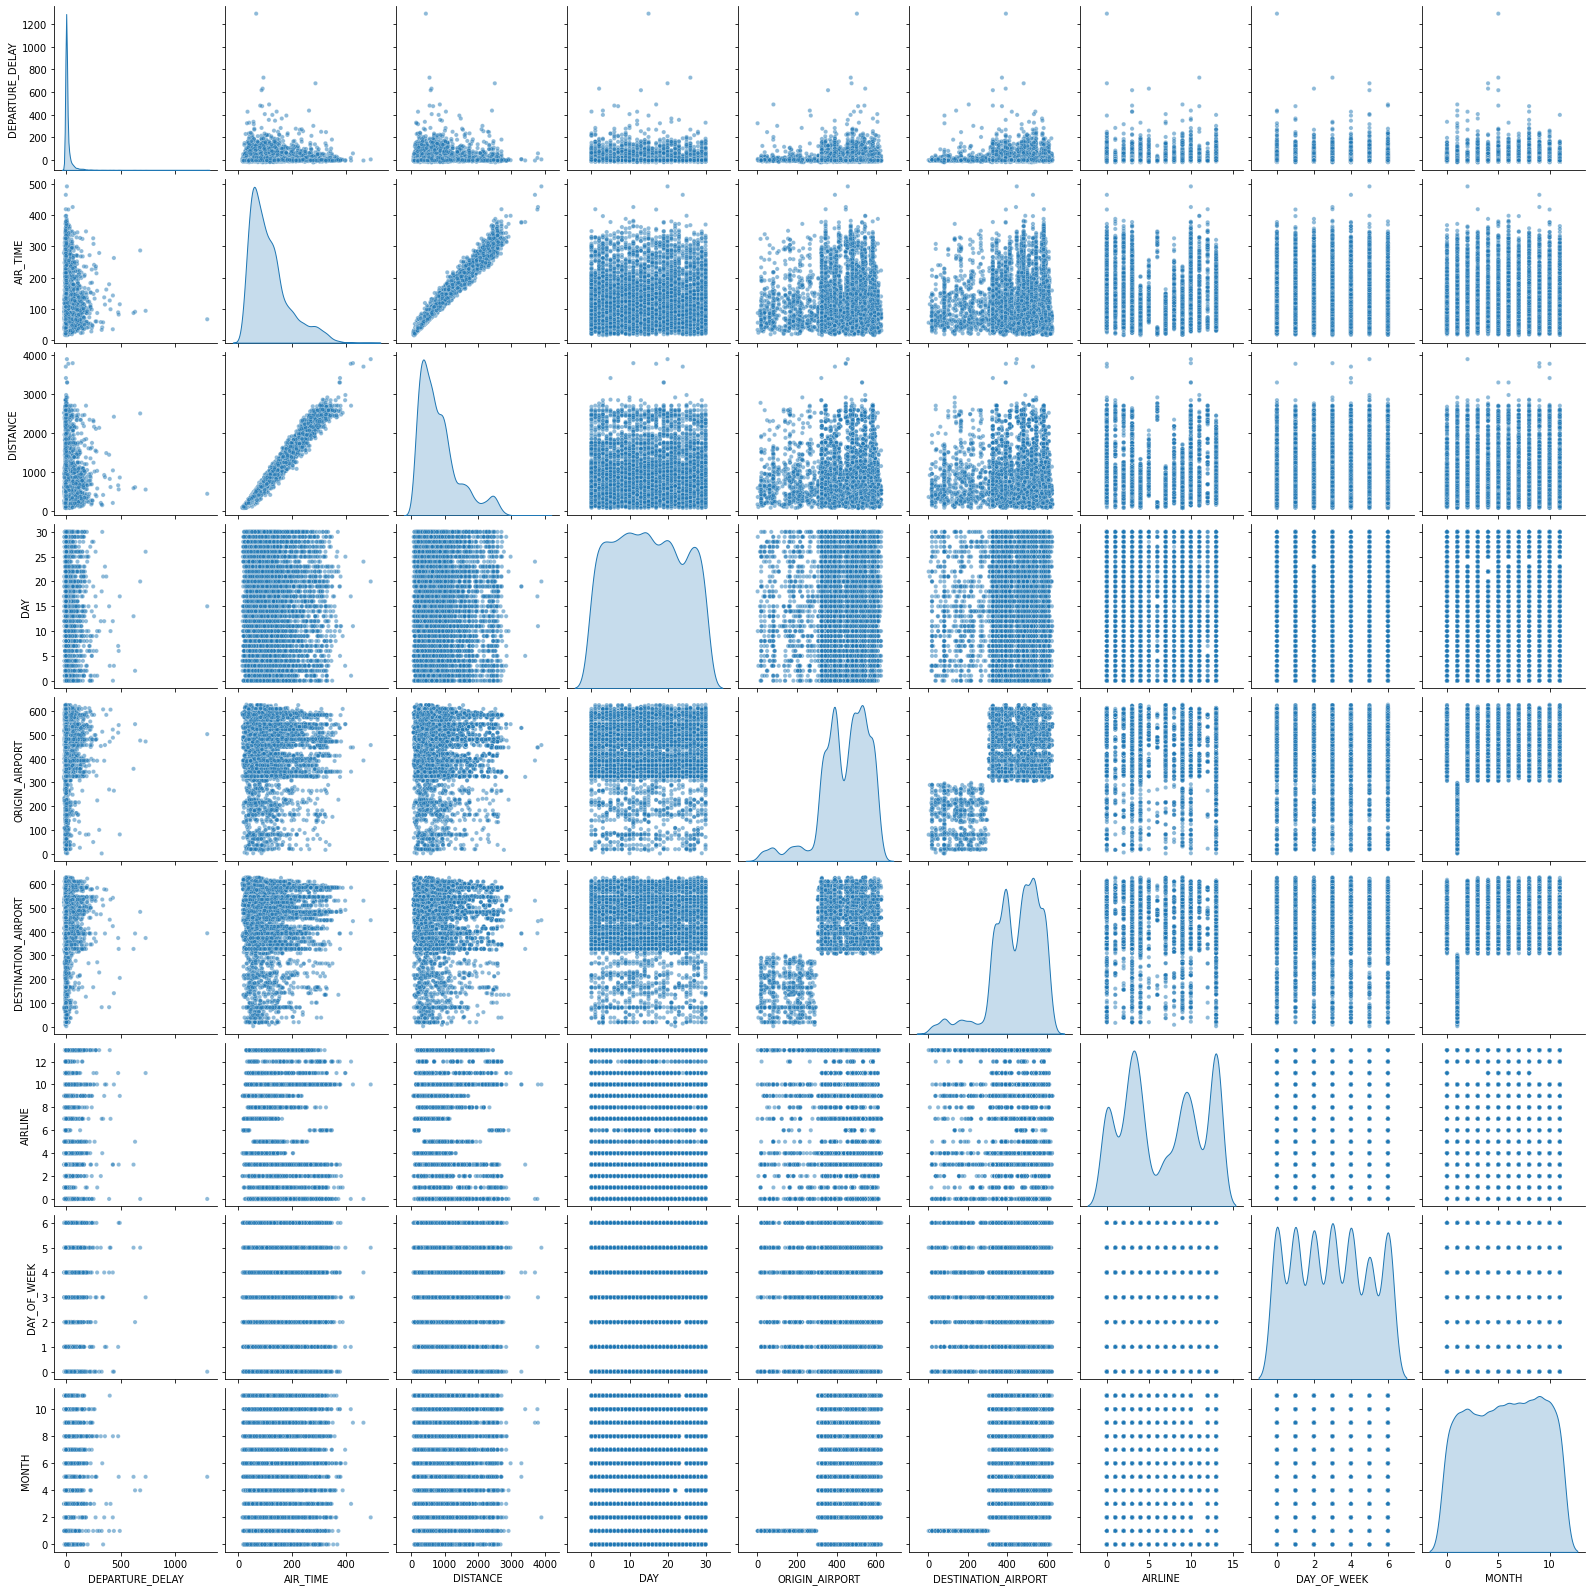

In [13]:
sns.pairplot(data=df_flights.sample(n=8000),
             vars=df_flights.columns,
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))

### Scaler

In [14]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_flights)
df_flight_noscale =df_flights
df_flights = scaler.transform (df_flights)

# Make df_flights into Dataframe
df_flights = pd.DataFrame(df_flights)
df_flights = df_flights.rename(columns={0:'DEPARTURE_DELAY',1:'AIR_TIME',2:'DISTANCE',3:'DAY',4:'ORINGIN_AIRPORT',5:'DESTINATION_AIRPORT',6:'AIRLINES',7:'DAY_OF_WEEK',8:'MONTH' })
df_flights

,DEPARTURE_DELAY,AIR_TIME,DISTANCE,DAY,ORINGIN_AIRPORT,DESTINATION_AIRPORT,AIRLINES,DAY_OF_WEEK,MONTH
0,0.034300,0.237189,0.287586,0.0,0.515152,0.929936,0.076923,0.5,0.000000
1,0.035749,0.374817,0.465337,0.0,0.768740,0.863057,0.000000,0.5,0.000000
2,0.038647,0.379209,0.458484,0.0,0.931419,0.593949,0.846154,0.5,0.000000
3,0.037198,0.367496,0.467755,0.0,0.768740,0.812102,0.000000,0.5,0.000000
4,0.039130,0.281113,0.287586,0.0,0.929825,0.515924,0.076923,0.5,0.000000
...,...,...,...,...,...,...,...,...,...
5819074,0.037681,0.387994,0.521967,0.8,0.768740,0.550955,0.153846,0.5,0.272727
5819075,0.037681,0.275256,0.321644,0.8,0.752791,0.883758,0.153846,0.5,0.272727
5819076,0.035266,0.278184,0.317815,0.8,0.752791,0.942675,0.153846,0.5,0.272727
5819077,0.036715,0.200586,0.235389,0.8,0.795853,0.942675,0.153846,0.5,0.272727


## Clean up NAN Value

In [15]:
# "DEPARTURE_DELAY", "AIR_TIME"
# When there is no departure_delay and arrival dealy, value would be None
# Under this condition, set these NAN values as 0

target = flights["ARRIVAL_DELAY"]
df_flights = df_flights.join(target)
# check NAN values
display(df_flights)
display(df_flights.isna().any())

df_flights['DEPARTURE_DELAY'] = df_flights['DEPARTURE_DELAY'].fillna(0)
df_flights['ARRIVAL_DELAY'] = df_flights['ARRIVAL_DELAY'].fillna(0)

print("After filling DEPARTURE_DELAY, and ARRIVAL_DELAY:")
display(df_flights.isna().any())

,DEPARTURE_DELAY,AIR_TIME,DISTANCE,DAY,ORINGIN_AIRPORT,DESTINATION_AIRPORT,AIRLINES,DAY_OF_WEEK,MONTH,ARRIVAL_DELAY
0,0.034300,0.237189,0.287586,0.0,0.515152,0.929936,0.076923,0.5,0.000000,-22.0
1,0.035749,0.374817,0.465337,0.0,0.768740,0.863057,0.000000,0.5,0.000000,-9.0
2,0.038647,0.379209,0.458484,0.0,0.931419,0.593949,0.846154,0.5,0.000000,5.0
3,0.037198,0.367496,0.467755,0.0,0.768740,0.812102,0.000000,0.5,0.000000,-9.0
4,0.039130,0.281113,0.287586,0.0,0.929825,0.515924,0.076923,0.5,0.000000,-21.0
...,...,...,...,...,...,...,...,...,...,...
5819074,0.037681,0.387994,0.521967,0.8,0.768740,0.550955,0.153846,0.5,0.272727,-26.0
5819075,0.037681,0.275256,0.321644,0.8,0.752791,0.883758,0.153846,0.5,0.272727,-16.0
5819076,0.035266,0.278184,0.317815,0.8,0.752791,0.942675,0.153846,0.5,0.272727,-8.0
5819077,0.036715,0.200586,0.235389,0.8,0.795853,0.942675,0.153846,0.5,0.272727,-10.0


DEPARTURE_DELAY         True
AIR_TIME                True
DISTANCE               False
DAY                    False
ORINGIN_AIRPORT        False
DESTINATION_AIRPORT    False
AIRLINES               False
DAY_OF_WEEK            False
MONTH                  False
ARRIVAL_DELAY           True
dtype: bool

After filling DEPARTURE_DELAY, and ARRIVAL_DELAY:


DEPARTURE_DELAY        False
AIR_TIME                True
DISTANCE               False
DAY                    False
ORINGIN_AIRPORT        False
DESTINATION_AIRPORT    False
AIRLINES               False
DAY_OF_WEEK            False
MONTH                  False
ARRIVAL_DELAY          False
dtype: bool

In [16]:
#Drop rows where the air_time is NAN. (It is noise on Air_time record)
# 0.18% of overall samples is dropped
df_flights = df_flights.dropna()
display(df_flights)
print("after deleting all rows that contain NaN values,")
display(df_flights.isna().any())

,DEPARTURE_DELAY,AIR_TIME,DISTANCE,DAY,ORINGIN_AIRPORT,DESTINATION_AIRPORT,AIRLINES,DAY_OF_WEEK,MONTH,ARRIVAL_DELAY
0,0.034300,0.237189,0.287586,0.0,0.515152,0.929936,0.076923,0.5,0.000000,-22.0
1,0.035749,0.374817,0.465337,0.0,0.768740,0.863057,0.000000,0.5,0.000000,-9.0
2,0.038647,0.379209,0.458484,0.0,0.931419,0.593949,0.846154,0.5,0.000000,5.0
3,0.037198,0.367496,0.467755,0.0,0.768740,0.812102,0.000000,0.5,0.000000,-9.0
4,0.039130,0.281113,0.287586,0.0,0.929825,0.515924,0.076923,0.5,0.000000,-21.0
...,...,...,...,...,...,...,...,...,...,...
5819074,0.037681,0.387994,0.521967,0.8,0.768740,0.550955,0.153846,0.5,0.272727,-26.0
5819075,0.037681,0.275256,0.321644,0.8,0.752791,0.883758,0.153846,0.5,0.272727,-16.0
5819076,0.035266,0.278184,0.317815,0.8,0.752791,0.942675,0.153846,0.5,0.272727,-8.0
5819077,0.036715,0.200586,0.235389,0.8,0.795853,0.942675,0.153846,0.5,0.272727,-10.0


after deleting all rows that contain NaN values,


DEPARTURE_DELAY        False
AIR_TIME               False
DISTANCE               False
DAY                    False
ORINGIN_AIRPORT        False
DESTINATION_AIRPORT    False
AIRLINES               False
DAY_OF_WEEK            False
MONTH                  False
ARRIVAL_DELAY          False
dtype: bool

## Model Training

### Test and Split




In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score

# split data
sample_count = df_flights.shape[0]
sample_flights = df_flights.sample(n=sample_count//10,replace=True)
X_train, X_test, y_train, y_test = train_test_split(sample_flights.drop(columns = ['ARRIVAL_DELAY']), sample_flights['ARRIVAL_DELAY'], test_size=0.2, random_state=42, shuffle=True)
display(X_train.shape)
display(y_train.shape)

(457120, 9)

(457120,)

### Linear Regression

In [27]:
# perform SGD
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
reg = SGDRegressor(shuffle=True, alpha=0.0001)
reg.fit(X=X_train, y=y_train)

y_pred = reg.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred)

print("Model weights: ")
print(reg.coef_)
print('Testing MSE:',mse1)
print("Model score:",reg.score(X_test, y_test) ) 
# indicating that with higher departure delay and longer air time, it is more likely to have longer arrival delay 
# the last weight (for distance) is negative, it indicates that with shorter distance, it is more likely to have longer arrival delay 

Model weights: 
[ 1.58038760e+03  1.52472526e+02 -1.42656123e+02 -1.08375220e-01
  4.34102668e+00 -4.07981987e-01 -3.16249544e-01 -8.60385214e-01
 -3.72254130e-01]
Testing MSE: 229.28830924264153
Model score: 0.8559836705042626


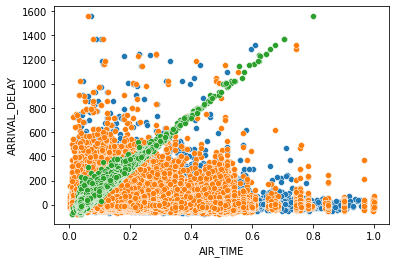

In [28]:
# the highest three weight corresponds to attribute Departure delay, airtime and distance

sns.scatterplot(X_train["AIR_TIME"], y_train)
sns.scatterplot(X_train["DISTANCE"], y_train)
sns.scatterplot(X_train["DEPARTURE_DELAY"], y_train)

### Polynomial Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform((X_train))
plr = LinearRegression(n_jobs=-1)
# Note that I didn't do reshape on X_poly as it's already a matrix.
plr.fit(X_poly, (y_train))
    
predicted = plr.predict(poly.transform((X_test)))
    
display(plr.intercept_)
display(plr.coef_[0:3])

print(f'Polynomial regression with degree = {3}')
print(f'Training MSE error is:',mean_squared_error(plr.predict(X_poly), y_train))
print(f'Testing MSE error is:', mean_squared_error(predicted, y_test))

-92.33449607965261

array([2072.50602469,  312.99716923, -300.7685924 ])

Polynomial regression with degree = 3
Training MSE error is: 132.16059610135298
Testing MSE error is: 133.2620227870209


### Further approaches

#### Lasso Regression

In [20]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)

train_mse = mean_squared_error(y_train,y_train_pred)
print('Training MSE:',train_mse)
y_hat = reg.predict(X_test)
print(f'Testing MSE error is: {round(mean_squared_error(y_hat, y_test),4)}')
print("Model score:",reg.score(X_test, y_test))

Training MSE: 195.28412001221363
Testing MSE error is: 196.4456
Model score: 0.8750636090753259


In [23]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.01,selection='random')
reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)

train_mse = mean_squared_error(y_train,y_train_pred)
print('Training MSE:',train_mse)
y_hat = reg.predict(X_test)
print(f'Testing MSE error is: {round(mean_squared_error(y_hat, y_test),4)}')
print("Model score:",reg.score(X_test, y_test))

Training MSE: 145.92349175757144
Testing MSE error is: 146.6074
Model score: 0.9067599268861968


#### Ridge Regression

In [29]:

from sklearn import linear_model
reg = linear_model.Ridge(alpha=.01,solver='sag')
reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)

train_mse = mean_squared_error(y_train,y_train_pred)
print('Training MSE:',train_mse)
y_hat = reg.predict(X_test)
print(f'Testing MSE error is: {round(mean_squared_error(y_hat, y_test),4)}')

print("Model weights: ")
print(reg.coef_)

z = reg.score(X_test, y_test)
print("Accuracy score: ",z)

Training MSE: 144.74424382161024
Testing MSE error is: 145.3695
Model weights: 
[ 2.08390045e+03  2.40227302e+02 -2.20074565e+02 -4.74701358e-01
  3.33394279e+00 -2.97211322e+00 -9.21901113e-02  2.21185581e-01
  3.58884997e-01]
Accuracy score:  0.907547226774908


Full scatter plot for the training data


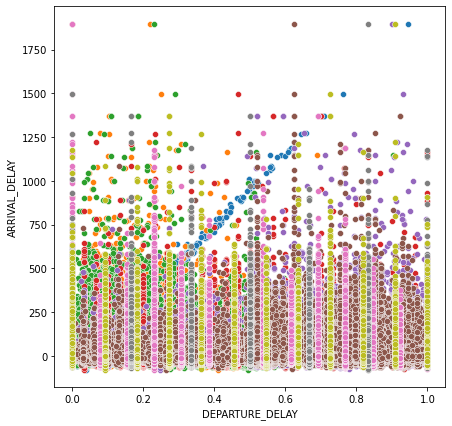

In [30]:

print("Full scatter plot for the training data")
plt.figure(figsize=(7, 7))
for i in range (len(X_train.columns)):
  sns.scatterplot(X_train[X_train.columns[i]], y_train)
plt.show()

Most Relvant Features


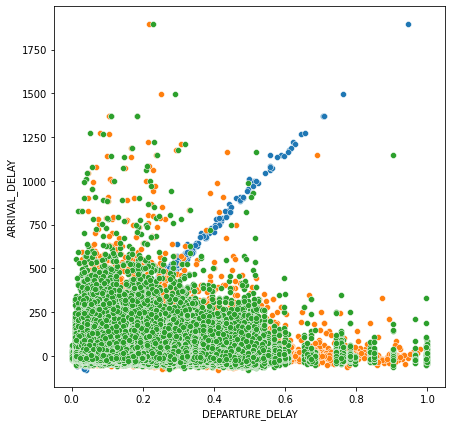

In [31]:

print("Most Relvant Features")
plt.figure(figsize=(7, 7))
sns.scatterplot(X_train["DEPARTURE_DELAY"], y_train)
sns.scatterplot(X_train["AIR_TIME"], y_train)
sns.scatterplot(X_train["DISTANCE"], y_train)
plt.show()